# Car Sales Price Prediction Using Artificial Neural Networks

In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text

In [3]:
#Reading the dataset
df = pd.read_csv("car_purchasing.csv", encoding='latin-1')

#Checking and first look
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Data Cleaning and Preprocessing

In [4]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
#Changing data type of gender to category
df['gender'] = df['gender'].astype('category')

In [6]:
#Dropping unnecessary columns; customer name, customer e-mail, country
df.drop('customer name', axis=1, inplace=True)
df.drop('customer e-mail', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [7]:
#Checking null values
df.isnull().sum()

#There are no null values

gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
#Checking unique values for categorical variable gender
print(df['gender'].unique())

#Variables are accurate, there are no outliers.

[0, 1]
Categories (2, int64): [0, 1]


### Outlier Detection

In [9]:
df.describe()

,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


#### Age

C:\Users\kkere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

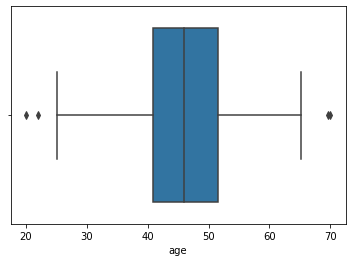

In [10]:
#Outlier Detection for age
sns.boxplot(df['age'])

In [11]:
#Checking age = 70
print(df[df['age']==70])

    gender   age  annual Salary  credit card debt    net worth  \
194      0  70.0     52323.2448       12438.85648  346555.1716   

     car purchase amount  
194           56229.4127  


In [12]:
#Checking age = 20
print(df[df['age']==20])

    gender   age  annual Salary  credit card debt    net worth  \
444      1  20.0    70467.29492             100.0  494606.6334   

     car purchase amount  
444          28645.39425  


#### Annual Salary

C:\Users\kkere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual Salary'>

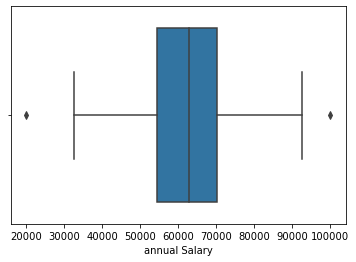

In [13]:
#Outlier Detection for annual Salary
sns.boxplot(df['annual Salary'])

In [14]:
#Checking annual salary = 20000
print(df[df['annual Salary']==20000])

   gender        age  annual Salary  credit card debt    net worth  \
89      1  32.094081        20000.0       14261.80773  579181.6552   

    car purchase amount  
89          12895.71468  


In [15]:
#Checking annual salary = 100000
print(df[df['annual Salary']==100000])

   gender        age  annual Salary  credit card debt    net worth  \
28      1  46.124036       100000.0       17452.92179  188032.0778   

    car purchase amount  
28          58350.31809  


In [16]:
#It will be looked further on other variables to decide whether these rows are outliers.

#### Credit Card Debt

C:\Users\kkere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit card debt'>

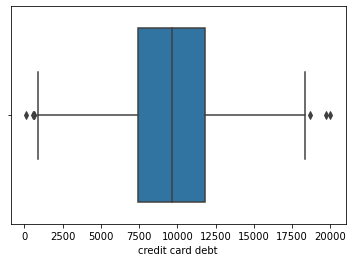

In [17]:
#Outlier Detection for credit card debt
sns.boxplot(df['credit card debt'])

In [18]:
#Checking credit card debt > 18000
print(df[df['credit card debt']>=18000])

    gender        age  annual Salary  credit card debt    net worth  \
130      1  53.380955    69255.98753       18361.24915  339207.2774   
221      1  36.408033    69494.69783       20000.00000  335809.6171   
253      1  46.205241    55434.04046       18693.14652  316906.6441   
440      1  39.665657    57777.15558       19692.91262  601210.2803   

     car purchase amount  
130          51551.67997  
221          37303.56701  
253          37093.92033  
440          41147.46679  


#### Net Worth

C:\Users\kkere\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='net worth'>

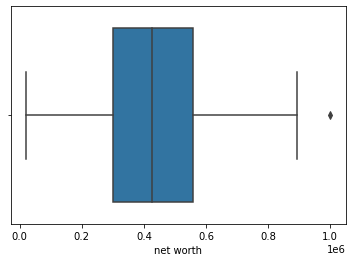

In [19]:
#Outlier Detection for networth
sns.boxplot(df['net worth'])

In [20]:
#Checking networth ==1000000
print(df[df['net worth']==1000000])

    gender        age  annual Salary  credit card debt  net worth  \
315      1  55.017566    83333.81054       9874.075327  1000000.0   

     car purchase amount  
315              80000.0  


#### There are no outliers found.

### Checking for Correlations

In [21]:
df.corr()

#All values are less then 0.7, so it will be assumed that there are no multicollinearity.

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.632865,0.617862,0.028882,0.488580,1.000000


## Algorithm 1: Linear Regression

In [112]:
# Defining predictor and the outcome variables
X = df[['age', 'gender', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

# Splitting the data into training and validation + test sets
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Splitting the validation + test set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state = 42)


In [113]:
# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
# Evaluating the model on the validation set
y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

# Printing the evaluation metrics for validation
print('Validation Set Metrics')
print('Mean Squared Error:', mse_valid)
print('Mean Absolute Error:', mae_valid)
print('R-squared:', r2_valid)

Validation Set Metrics
Mean Squared Error: 1.5707642412258584
Mean Absolute Error: 1.0313568339589256
R-squared: 0.9999999866123499


In [115]:
# Evaluating the model on the testing set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Printing the evaluation metrics for test
print('Testing Set Metrics')
print('Mean Squared Error:', mse_test)
print('Mean Absolute Error:', mae_test)
print('R-squared:', r2_test)

Testing Set Metrics
Mean Squared Error: 2.6179749646523196
Mean Absolute Error: 1.2757849540834285
R-squared: 0.9999999710334759


## Algorithm 2: KNN

In [116]:
# Defining predictor and the outcome variables
X = df[['age', 'gender', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

In [117]:
#Normalizing the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [118]:
# Splitting the data into training and validation + test sets
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_norm, y, test_size=0.2, random_state = 42)

# Splitting the validation + test set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state = 42)

In [119]:
# Building the model
k = 5 # set the number of neighbors to consider
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [120]:
# Evaluating the model on the validation set
y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
mae_valid = mean_absolute_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

# Printing the evaluation metrics for validation
print('Validation Set Metrics')
print('Mean Squared Error:', mse_valid)
print('Mean Absolute Error:', mae_valid)
print('R-squared:', r2_valid)

Validation Set Metrics
Mean Squared Error: 12564941.31533448
Mean Absolute Error: 2855.5873692000005
R-squared: 0.892908793060003


In [121]:
# Evaluating the model on the testing set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Printing the evaluation metrics for test
print('Testing Set Metrics')
print('Mean Squared Error:', mse_test)
print('Mean Absolute Error:', mae_test)
print('R-squared:', r2_test)

Testing Set Metrics
Mean Squared Error: 10125965.757315077
Mean Absolute Error: 2376.6105505600003
R-squared: 0.8879614837524163


In [122]:
#Measure accuracy for different K values and print
results = []
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'mean_squared_error': mean_squared_error(y_test, knn.predict(X_test))
    })

results = pd.DataFrame(results)
print(results)

#k = 5 gives the best accuracy

    k  mean_squared_error
0   1        1.394367e+07
1   2        1.106653e+07
2   3        1.145812e+07
3   4        1.183972e+07
4   5        1.012597e+07
5   6        1.033511e+07
6   7        1.192489e+07
7   8        1.188250e+07
8   9        1.226796e+07
9  10        1.213097e+07


## Algorithm 3: NEURAL NETWORK

In [164]:
# Defining predictor and the outcome variables
X = df[['age', 'gender', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

classes = sorted(y.unique())

In [165]:
#Normalizing the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [166]:
# Splitting the data into training and validation + test sets
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_norm, y, test_size=0.2, random_state = 42)

# Splitting the validation + test set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state = 42)

In [171]:

#While we watched the model's performance on the validation set, we gradually raised the number of neurons in the hidden 
#layers from a lower starting point.
# We discovered that employing three hidden layers, provided a fair balance between model 
#complexity and validation set generalization ability.
#I choose 10000 iterations because it will give the optimization method more time to run, which help the model converge to a better 
#set of parameters and perform better on the training data.

model = MLPRegressor(hidden_layer_sizes=(200, 200, 200), activation='relu', solver='adam', max_iter=10000)

In [172]:
# Running the model n times and storing the evaluation metrics for each run
n = 10
mse_valid_list = []
mae_valid_list = []
r2_valid_list = []

for i in range(n):
    # Fitting the model on the training set
    model.fit(X_train, y_train)

    # Evaluating the model on the validation set
    y_valid_pred = model.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    
    # Storing the evaluation metrics for this run
    mse_valid_list.append(mse_valid)
    mae_valid_list.append(mae_valid)
    r2_valid_list.append(r2_valid)

# Printing the evaluation metrics for all runs
print('Validation Set Metrics for all Runs')
print('Mean Squared Error:', np.mean(mse_valid_list))
print('Mean Absolute Error:', np.mean(mae_valid_list))
print('R-squared:', np.mean(r2_valid_list))

Validation Set Metrics for all Runs
Mean Squared Error: 4155.528204176893
Mean Absolute Error: 32.505198105605096
R-squared: 0.9999645823629661


In [173]:
# Running the model n times and storing the evaluation metrics for each run
n = 10
mse_test_list = []
mae_test_list = []
r2_test_list = []

for i in range(n):
    # Fitting the model on the training set
    model.fit(X_train, y_train)

    # Evaluating the model on the validation set
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Storing the evaluation metrics for this run
    mse_test_list.append(mse_test)
    mae_test_list.append(mae_test)
    r2_test_list.append(r2_test)

# Printing the evaluation metrics for all runs
print('Test Set Metrics for all Runs')
print('Mean Squared Error:', np.mean(mse_test_list))
print('Mean Absolute Error:', np.mean(mae_test_list))
print('R-squared:', np.mean(r2_test_list))

Validation Set Metrics for all Runs
Mean Squared Error: 8260.418247700338
Mean Absolute Error: 47.53338181099891
R-squared: 0.9999086027914533


# Algorithm 4: Decision Tree

In [58]:
# Defining predictor and the outcome variables
X = df[['age', 'gender', 'annual Salary', 'credit card debt', 'net worth']]
y = df['car purchase amount']

In [59]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Creating a decision tree regressor with a max depth of 4
model = DecisionTreeRegressor(max_depth=4, random_state=42)


In [61]:
# Training the model on the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

<IPython.core.display.Javascript object>


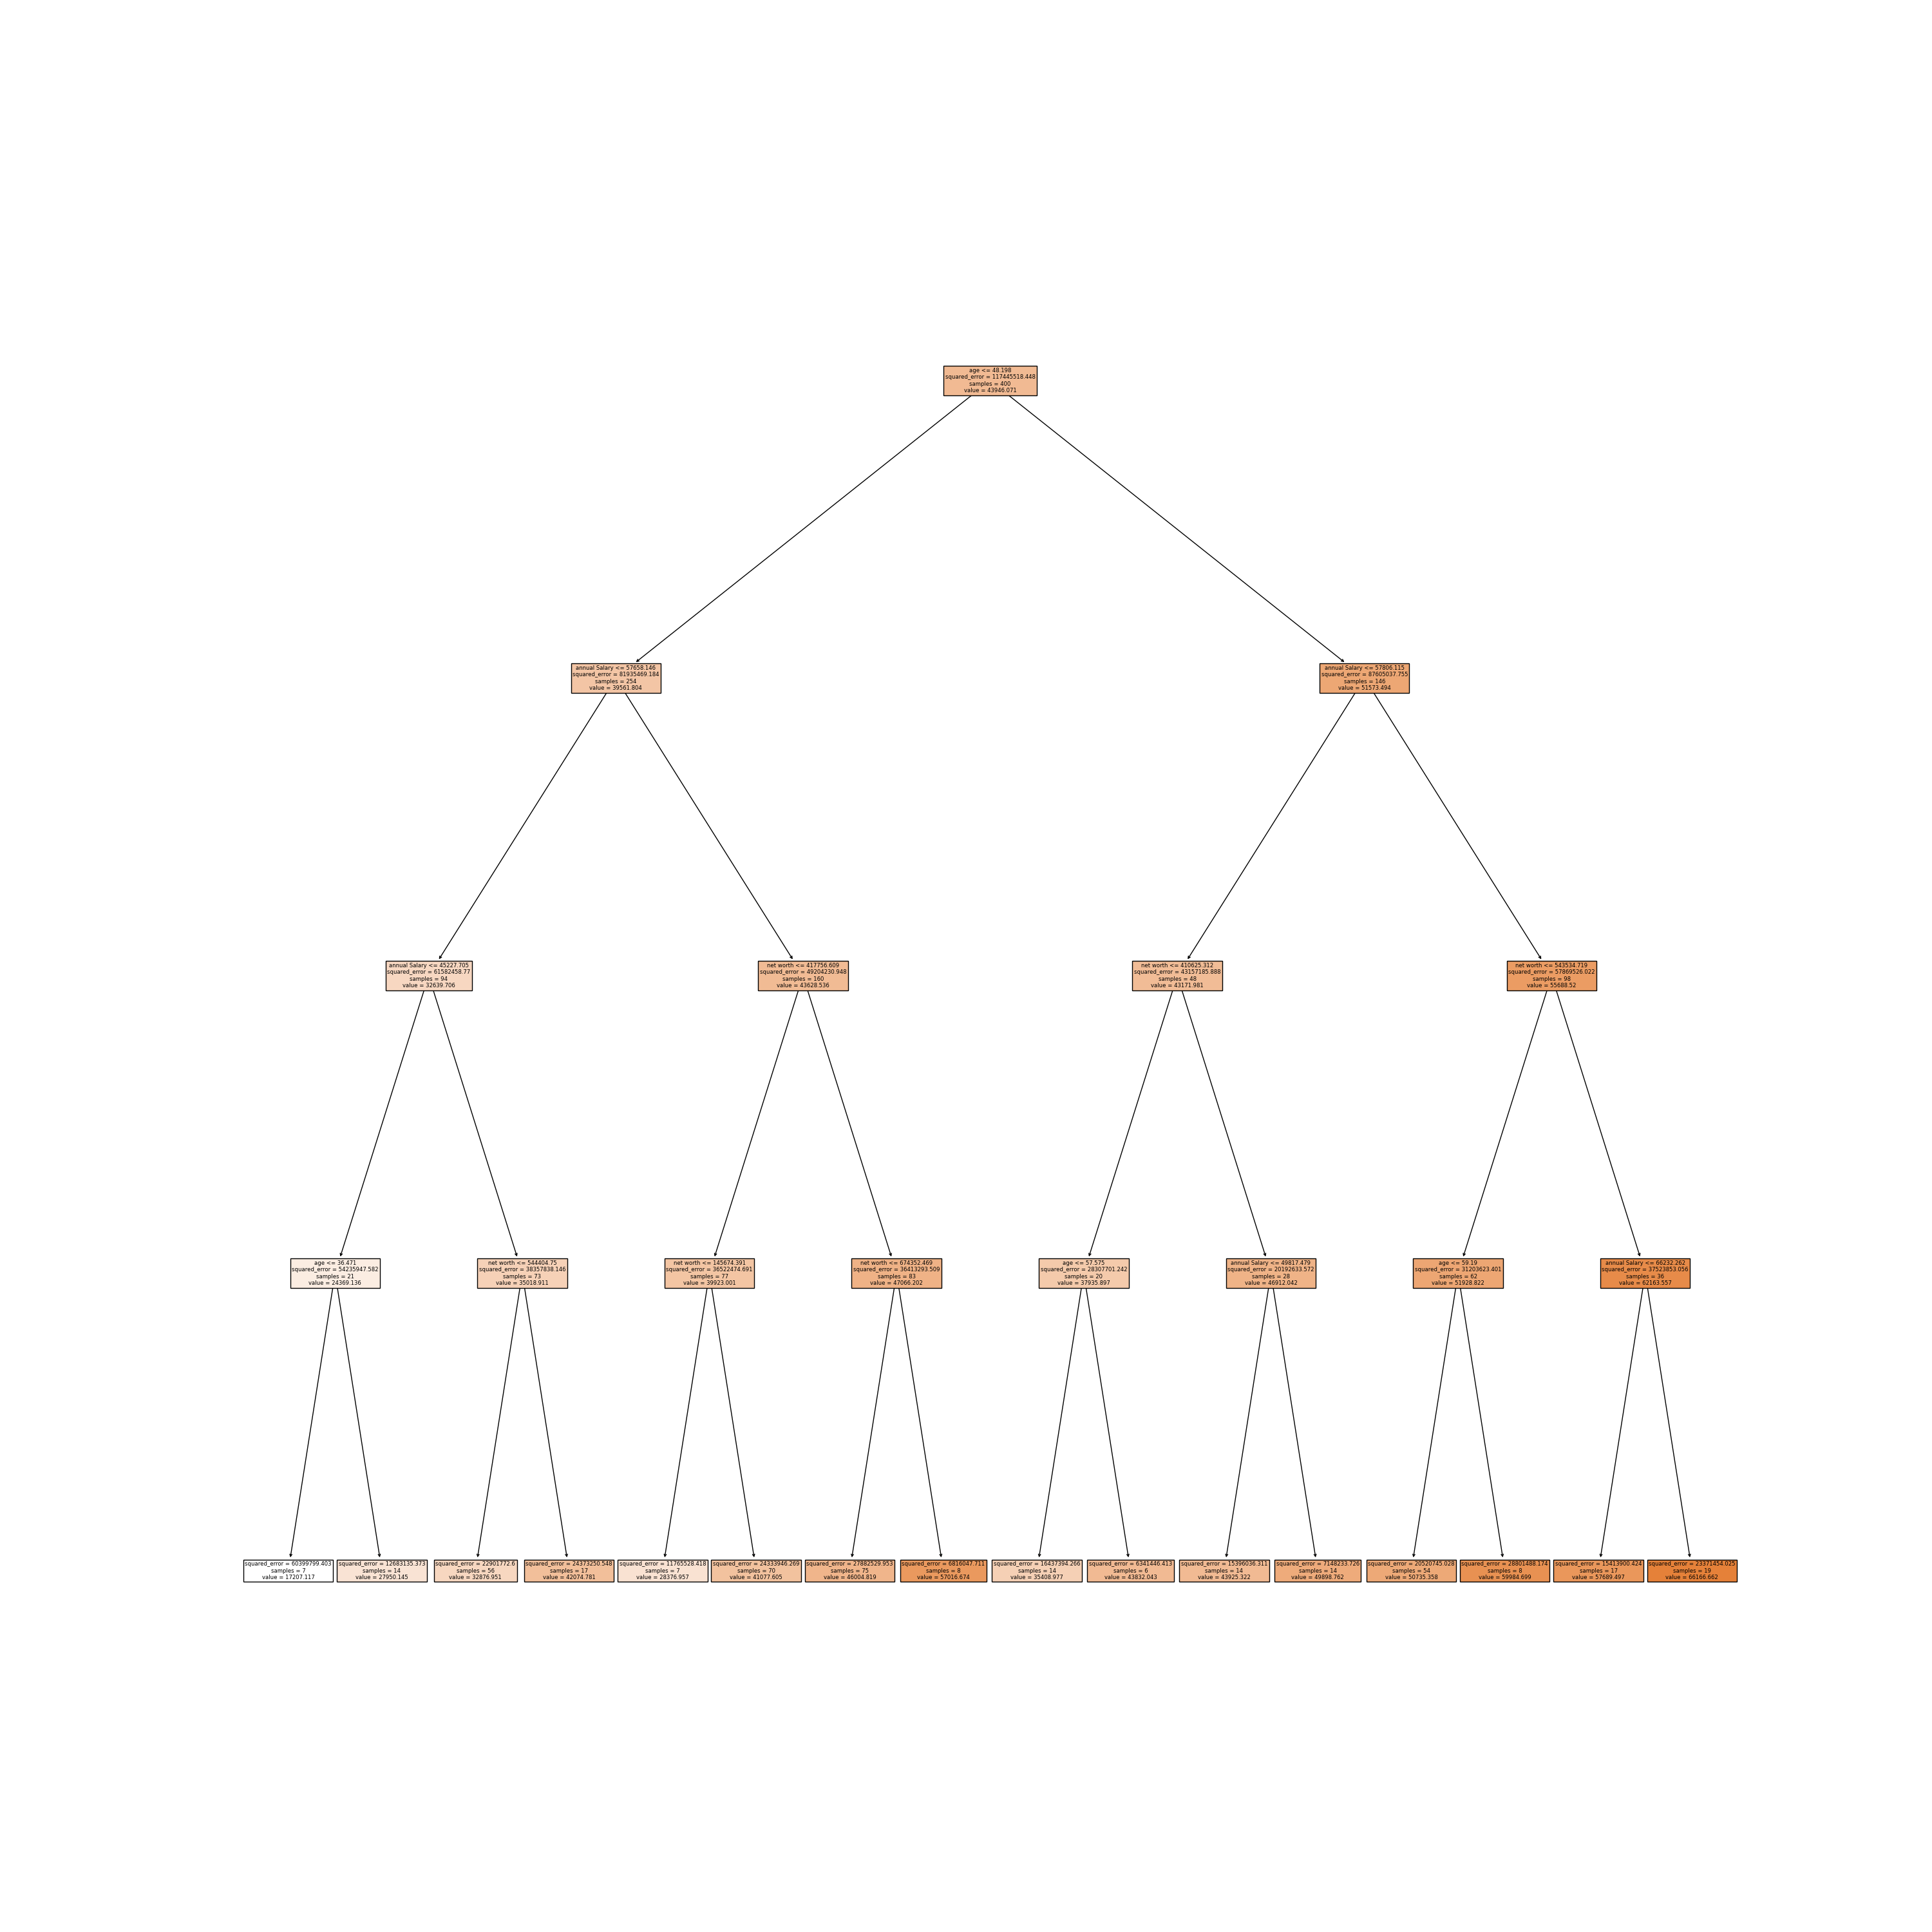

In [62]:
%matplotlib notebook
# Setting the figure size and font size
fig, ax = plt.subplots(figsize=(30, 30))
plt.rcParams.update({'font.size': 14})

# Plotting the decision tree
plot_tree(model, ax=ax, feature_names=X.columns, filled=True)

# Displaying the plot
plt.show()

In [63]:
# Printing the rules of the decision tree
print(export_text(model, feature_names=list(X.columns)))

|--- age <= 48.20
|   |--- annual Salary <= 57658.15
|   |   |--- annual Salary <= 45227.71
|   |   |   |--- age <= 36.47
|   |   |   |   |--- value: [17207.12]
|   |   |   |--- age >  36.47
|   |   |   |   |--- value: [27950.15]
|   |   |--- annual Salary >  45227.71
|   |   |   |--- net worth <= 544404.75
|   |   |   |   |--- value: [32876.95]
|   |   |   |--- net worth >  544404.75
|   |   |   |   |--- value: [42074.78]
|   |--- annual Salary >  57658.15
|   |   |--- net worth <= 417756.61
|   |   |   |--- net worth <= 145674.39
|   |   |   |   |--- value: [28376.96]
|   |   |   |--- net worth >  145674.39
|   |   |   |   |--- value: [41077.60]
|   |   |--- net worth >  417756.61
|   |   |   |--- net worth <= 674352.47
|   |   |   |   |--- value: [46004.82]
|   |   |   |--- net worth >  674352.47
|   |   |   |   |--- value: [57016.67]
|--- age >  48.20
|   |--- annual Salary <= 57806.12
|   |   |--- net worth <= 410625.31
|   |   |   |--- age <= 57.58
|   |   |   |   |--- value: [35

In [64]:
# Predicting on the testing data
y_pred = model.predict(X_test)

In [65]:
# Evaluating the model using mean squared error, mean absolute error, and r-squared
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print("Testing Set Metrics")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Testing Set Metrics
Mean Squared Error: 38593725.34337752
Mean Absolute Error: 5104.29276349082
R-squared: 0.6425618596613485
